In [1]:
import sys
import os
import random
import urllib.request
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs
from IPython.display import Image, display

flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [7]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

#FLAGS.image = 'images/kinect_apple_image.png
FLAGS.image = 'images/applesonaplate.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

I0712 20:01:14.474976  9100 <ipython-input-7-ca765abbaa3e>:12] weights loaded
I0712 20:01:14.475973  9100 <ipython-input-7-ca765abbaa3e>:15] classes loaded
I0712 20:01:14.700414  9100 <ipython-input-7-ca765abbaa3e>:26] time: 0.1945207118988037
I0712 20:01:14.701370  9100 <ipython-input-7-ca765abbaa3e>:28] detections:
I0712 20:01:14.704362  9100 <ipython-input-7-ca765abbaa3e>:32] 	knife, 0.9844904541969299, [0.88625   0.5186387 0.9866178 0.9167568]
I0712 20:01:14.707354  9100 <ipython-input-7-ca765abbaa3e>:32] 	apple, 0.9820142984390259, [0.04329063 0.03750134 0.3689764  0.4697551 ]
I0712 20:01:14.710347  9100 <ipython-input-7-ca765abbaa3e>:32] 	apple, 0.871579110622406, [0.5875266  0.35687178 0.7612149  0.6818103 ]
I0712 20:01:14.713338  9100 <ipython-input-7-ca765abbaa3e>:32] 	apple, 0.8429139256477356, [0.16880125 0.19334091 0.5560336  0.6919428 ]
I0712 20:01:14.716330  9100 <ipython-input-7-ca765abbaa3e>:32] 	apple, 0.7877813577651978, [0.00674518 0.10688815 0.09213757 0.48383948]
I

[885 480]
[195 169]
[637 347]
[342 296]
[ 46 197]
[470 375]


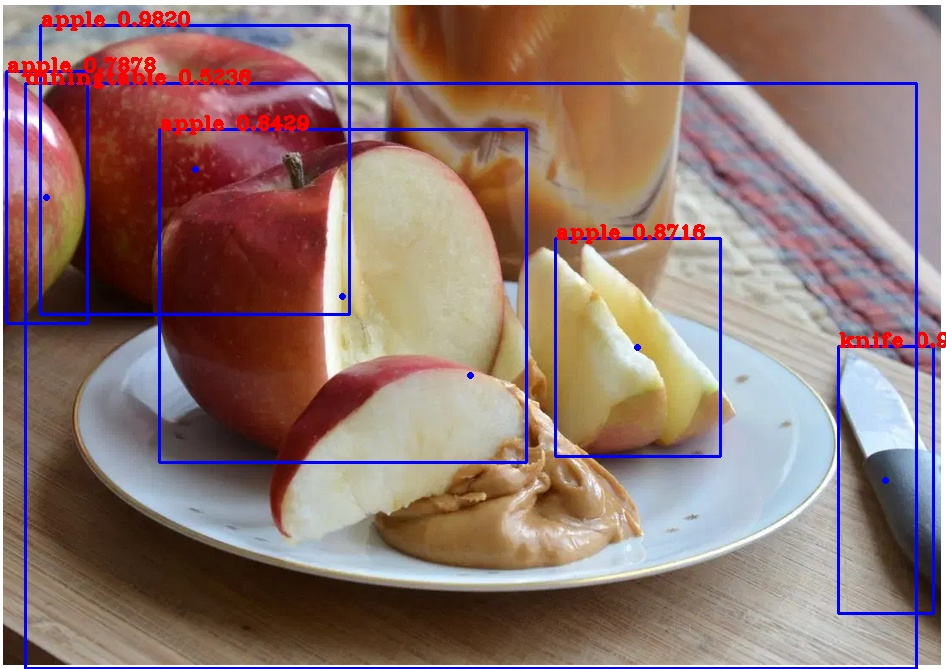

In [9]:
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

np.array(boxes[0][0])=  [0.88625   0.5186387 0.9866178 0.9167568]
np.array(boxes[0][0][0])=  0.88625
boxes[0][0][0]=  tf.Tensor(0.88625, shape=(), dtype=float32)
type(boxes[0][0][0]=  <class 'tensorflow.python.framework.ops.EagerTensor'>
x1y1= (0.88625, 0.5186387) x2y2= (0.9866178, 0.9167568)
[885 480]
[195 169]
[637 347]
[342 296]
[ 46 197]
[470 375]


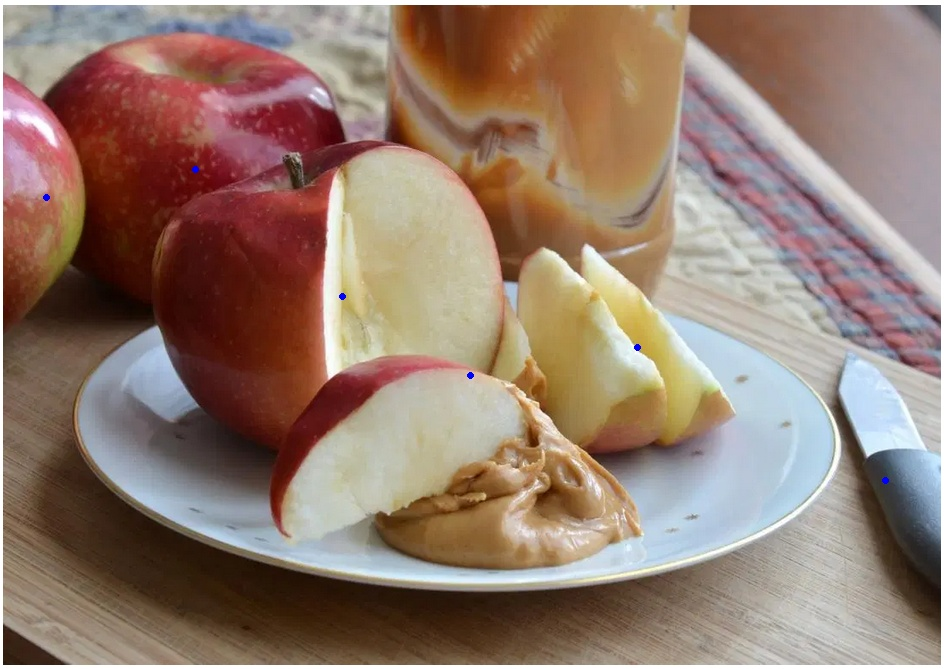

In [8]:
##TESTING

print('np.array(boxes[0][0])= ',np.array(boxes[0][0]))
print('np.array(boxes[0][0][0])= ',np.array(boxes[0][0][0]))
print('boxes[0][0][0]= ',boxes[0][0][0])
print('type(boxes[0][0][0]= ',type(boxes[0][0][0]))
wh = np.flip(img.shape[0:2])

x1y1 = tuple((np.array(boxes[0][0][0:2])).astype(np.float32))
x2y2 = tuple((np.array(boxes[0][0][2:4])).astype(np.float32))

print('x1y1=',x1y1,'x2y2=',x2y2)


for i in range(nums[0]):  
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
print('nums = ', nums)
print('nums[0] = ',nums[0])
print('np.array(nums[0]) = ',np.array(nums[0]) )
print(range(np.array(nums[0])))


In [ ]:
T_cam_wrt_base =  np.array([[6.123233995736766e-17, -1.0, 1.2246467991473532e-16, 0.5358999967575073], [-1.0, -6.123233995736766e-17, 7.498798913309288e-33, -0.4707499146461487], [-0.0, -1.2246467991473532e-16, -1.0, 0.28238946199417114], [0, 0, 0, 1]])
print('len =', len(T_cam_wrt_base))

rows = T_cam_wrt_base.shape[0]
cols = T_cam_wrt_base.shape[1]

for x in range(0, rows):
    for y in range(0, cols):
        print(T_cam_wrt_base[x,y])

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/side_view_1.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/side_view_2.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/side_view_3.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/side_view_4.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/side_view_5.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/side_view_6.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/side_view_7.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/top_view.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [ ]:
APPLE_IMAGE_PATH = r"D:\Research Report\tensorflow\yolov3-tf2-master\yolov3-tf2-master\images"

FLAGS.image = 'images/top_view2.png'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)

img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
wh = np.flip(img.shape[0:2])

for i in range(nums[0]):
    rect_center_x = (boxes[0][i][0]+boxes[0][i][2])/2  
    rect_center_y = (boxes[0][i][1]+boxes[0][i][3])/2
    #print(rect_center_x, rect_center_y)
    rect_center = np.array([rect_center_x,rect_center_y]*wh).astype(np.int32)
    img = cv2.circle(img, tuple(rect_center),2,(255, 0, 0), 2)
    print(rect_center)
    
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))